#Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
import plotly.express as px

#Data Wrangling

##Gathering Data

In [11]:
df_Pelatihan = pd.read_csv('DataSet_Pelatihan.csv')
df_Pelatihan

,Titik Awal,Koordinat Awal,Tujuan,Koordinat Tujuan,Jarak Tempuh (km),Waktu Tempuh (menit),Kapasitas Full Tanki Bensin (liter),Jarak Tempuh Bensin per Liter (km/l),Rekomendasi_SPBU,Rekomendasi_TempatIstirahat,Rekomendasi_Penginapan
0,Situ Gede,"(-7.323856, 108.22867)",Pantai Kejawanan,"(-6.73358, 108.581212)",76.300259,99,11,46.938480,tidak,ya,tidak
1,Tugu Pahlawan,"(-7.245971, 112.737826)",Kenjeran Park,"(-7.22302, 112.790361)",6.332164,7,8,36.961574,tidak,tidak,tidak
2,Kota Tua,"(-6.1352, 106.813301)",Gunung Galunggung,"(-7.241253, 108.082577)",186.479870,199,11,35.142248,tidak,ya,tidak
3,Monas,"(-6.175392, 106.827153)",Simpang Lima,"(-6.9925, 110.420601)",407.199611,488,14,43.659503,tidak,ya,tidak
4,Kediri Mall,"(-7.82424, 112.011388)",Pantai Kejawanan,"(-6.73358, 108.581212)",397.299735,418,15,42.836611,tidak,ya,tidak
...,...,...,...,...,...,...,...,...,...,...,...
995,Kenjeran Park,"(-7.22302, 112.790361)",Masjid Agung Serang,"(-6.117978, 106.153106)",743.243088,810,9,45.136584,ya,ya,ya
996,Gua Maria Pohsarang,"(-7.856367, 112.010669)",Lawang Sewu,"(-6.983784, 110.40908)",201.494722,219,11,46.270038,tidak,ya,tidak
997,Trans Studio,"(-6.926855, 107.634515)",Simpang Lima Gumul,"(-7.815934, 112.011961)",492.739340,518,14,36.050032,ya,ya,tidak
998,Kraton,"(-7.805691, 110.364914)",Kota Tua,"(-6.1352, 106.813301)",433.770584,481,14,44.270519,tidak,ya,tidak


##Cleaning Data

In [12]:
#Display information about the DataFrame df_Pelatihan
df_Pelatihan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Titik Awal                            1000 non-null   object 
 1   Koordinat Awal                        1000 non-null   object 
 2   Tujuan                                1000 non-null   object 
 3   Koordinat Tujuan                      1000 non-null   object 
 4   Jarak Tempuh (km)                     1000 non-null   float64
 5   Waktu Tempuh (menit)                  1000 non-null   int64  
 6   Kapasitas Full Tanki Bensin (liter)   1000 non-null   int64  
 7   Jarak Tempuh Bensin per Liter (km/l)  1000 non-null   float64
 8   Rekomendasi_SPBU                      1000 non-null   object 
 9   Rekomendasi_TempatIstirahat           1000 non-null   object 
 10  Rekomendasi_Penginapan                1000 non-null   object 
dtypes: float64(2), int

In [13]:
#Checking for missing value
df_Pelatihan.isnull().sum()

Titik Awal                              0
Koordinat Awal                          0
Tujuan                                  0
Koordinat Tujuan                        0
Jarak Tempuh (km)                       0
Waktu Tempuh (menit)                    0
Kapasitas Full Tanki Bensin (liter)     0
Jarak Tempuh Bensin per Liter (km/l)    0
Rekomendasi_SPBU                        0
Rekomendasi_TempatIstirahat             0
Rekomendasi_Penginapan                  0
dtype: int64

In [14]:
#Checking for duplicate columns names
df_Pelatihan.columns.duplicated().sum()

0

##Exploratory Data Analysis (EDA)

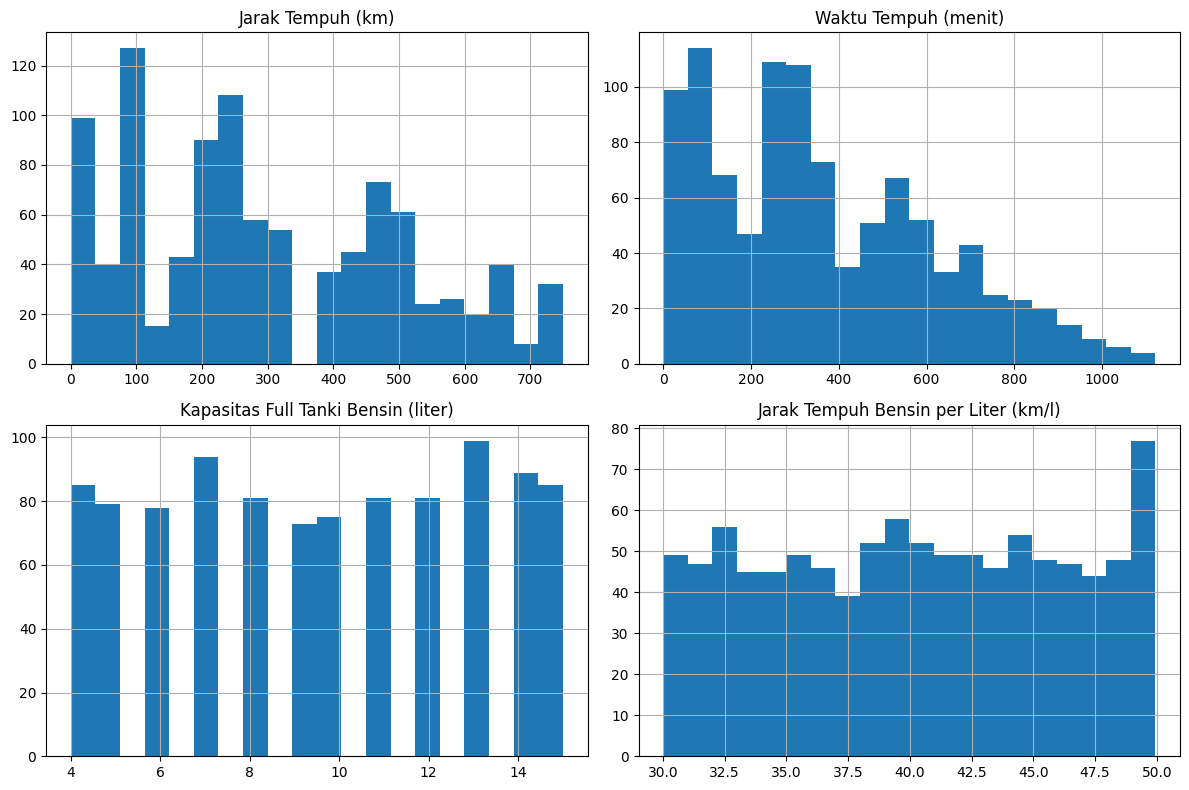

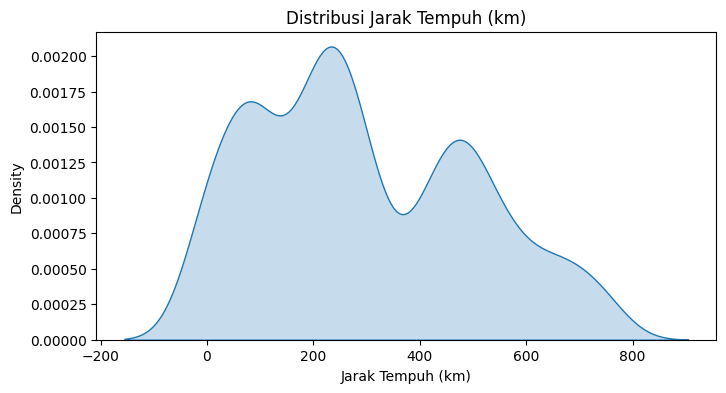

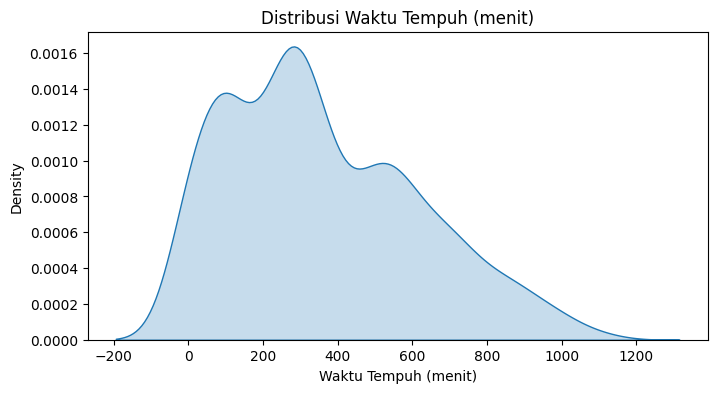

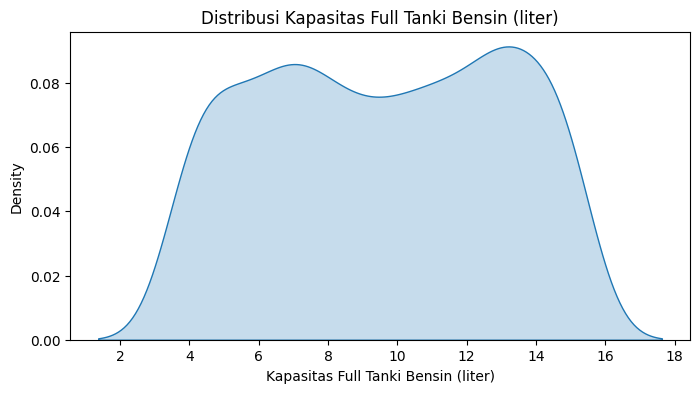

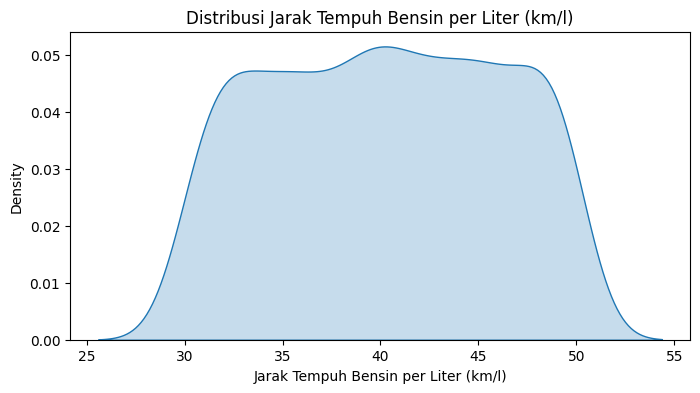

In [15]:
# Histogram
df_Pelatihan.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

# Plot KDE
for col in df_Pelatihan.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df_Pelatihan[col], fill=True)
    plt.title(f'Distribusi {col}')
    plt.show()

In [16]:
df_Pelatihan.head(10)

,Titik Awal,Koordinat Awal,Tujuan,Koordinat Tujuan,Jarak Tempuh (km),Waktu Tempuh (menit),Kapasitas Full Tanki Bensin (liter),Jarak Tempuh Bensin per Liter (km/l),Rekomendasi_SPBU,Rekomendasi_TempatIstirahat,Rekomendasi_Penginapan
0,Situ Gede,"(-7.323856, 108.22867)",Pantai Kejawanan,"(-6.73358, 108.581212)",76.300259,99,11,46.938480,tidak,ya,tidak
1,Tugu Pahlawan,"(-7.245971, 112.737826)",Kenjeran Park,"(-7.22302, 112.790361)",6.332164,7,8,36.961574,tidak,tidak,tidak
2,Kota Tua,"(-6.1352, 106.813301)",Gunung Galunggung,"(-7.241253, 108.082577)",186.479870,199,11,35.142248,tidak,ya,tidak
3,Monas,"(-6.175392, 106.827153)",Simpang Lima,"(-6.9925, 110.420601)",407.199611,488,14,43.659503,tidak,ya,tidak
4,Kediri Mall,"(-7.82424, 112.011388)",Pantai Kejawanan,"(-6.73358, 108.581212)",397.299735,418,15,42.836611,tidak,ya,tidak
5,Gunung Galunggung,"(-7.241253, 108.082577)",Pantai Kejawanan,"(-6.73358, 108.581212)",78.837709,107,7,43.401599,tidak,ya,tidak
6,Pantai Kejawanan,"(-6.73358, 108.581212)",Alun-Alun Malang,"(-7.978639, 112.630141)",467.474824,572,15,35.722607,ya,ya,tidak
7,Sam Poo Kong,"(-6.992966, 110.389888)",Jatim Park,"(-7.887634, 112.53475)",256.559642,327,4,36.847676,ya,ya,tidak
8,Gedung Sate,"(-6.902475, 107.618782)",Coban Rondo,"(-7.895497, 112.533402)",553.055438,706,4,42.186443,ya,ya,ya
9,Pantai Kejawanan,"(-6.73358, 108.581212)",Trans Studio,"(-6.926855, 107.634515)",106.707342,148,13,30.961183,tidak,ya,tidak


In [17]:
df_Pelatihan.describe()

,Jarak Tempuh (km),Waktu Tempuh (menit),Kapasitas Full Tanki Bensin (liter),Jarak Tempuh Bensin per Liter (km/l)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,297.099708,360.784000,9.587000,40.234908
std,205.747512,258.286591,3.494659,5.870088
min,0.000000,0.000000,4.000000,30.008404
25%,107.173795,132.000000,7.000000,35.192284
50%,256.318123,308.500000,10.000000,40.267630
75%,478.318094,539.000000,13.000000,45.297440
max,749.342180,1121.000000,15.000000,49.943491


In [18]:
df_Pelatihan.shape

(1000, 11)

#Pemodelan

##Pemodelan Rekomendasi SPBU

Akurasi: 0.95
Laporan Klasifikasi:
              precision    recall  f1-score   support

       tidak       0.95      0.95      0.95       155
          ya       0.95      0.95      0.95       145

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



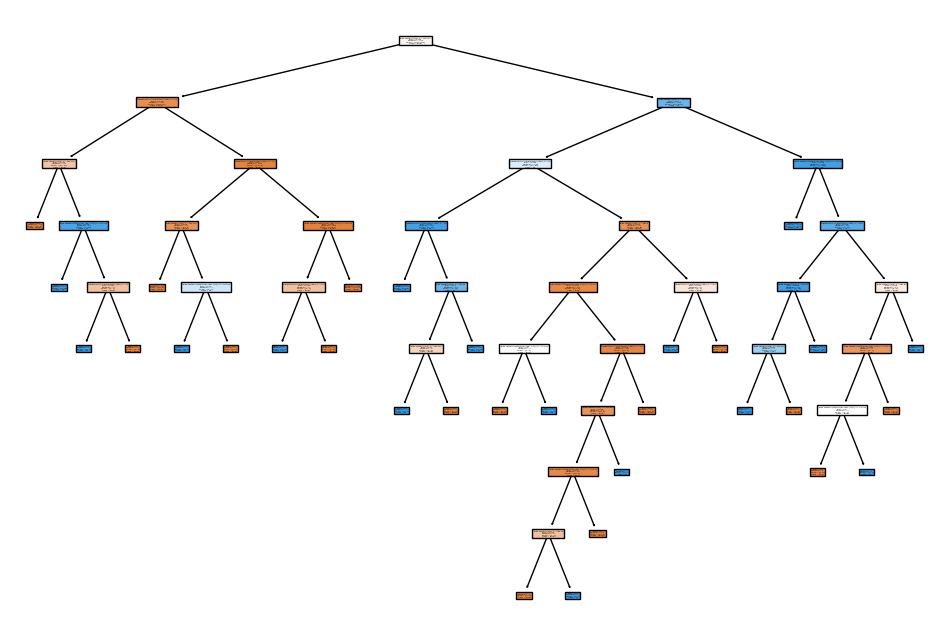

In [19]:
# Tentuka Fitur dan Target
XS = df_Pelatihan[['Kapasitas Full Tanki Bensin (liter)', 'Jarak Tempuh Bensin per Liter (km/l)', 'Jarak Tempuh (km)']]
yS = df_Pelatihan['Rekomendasi_SPBU']  # Memperbaiki pemilihan kolom target

# Bagi data menjadi training dan testing set
XS_train, XS_test, yS_train, yS_test = train_test_split(XS, yS, test_size=0.3, random_state=42)

# Inisialisasi model decision tree
model_Spbu = DecisionTreeClassifier(random_state=42)

# Latih model dengan data training
model_Spbu.fit(XS_train, yS_train)

# Prediksi dengan data testing
yS_pred = model_Spbu.predict(XS_test)

# Evaluasi akurasi model
accuracy = accuracy_score(yS_test, yS_pred)
print(f'Akurasi: {accuracy:.2f}')

# Print laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(yS_test, yS_pred))  # Menghapus parameter target_names karena hanya memiliki dua kelas

# Visualisasikan tree
plt.figure(figsize=(12, 8))
plot_tree(model_Spbu, feature_names=XS.columns, class_names=model_Spbu.classes_, filled=True)  # Menggunakan model_Rest
plt.show()


In [20]:
# Coba model pada data testing
test_data = pd.DataFrame({
    'Kapasitas Full Tanki Bensin (liter)': [50, 60, 70, 80],
    'Jarak Tempuh Bensin per Liter (km/l)': [10, 12, 15, 18],
    'Jarak Tempuh (km)': [500, 410, 150, 180]
})

predictions = model_Spbu.predict(test_data)
print("Rekomendasi SPBU:", predictions)


Rekomendasi SPBU: ['ya' 'ya' 'tidak' 'tidak']


##Pemodelan Tempat Istirahat

Akurasi: 1.00
Laporan Klasifikasi:
              precision    recall  f1-score   support

       tidak       1.00      0.98      0.99        44
          ya       1.00      1.00      1.00       256

    accuracy                           1.00       300
   macro avg       1.00      0.99      0.99       300
weighted avg       1.00      1.00      1.00       300



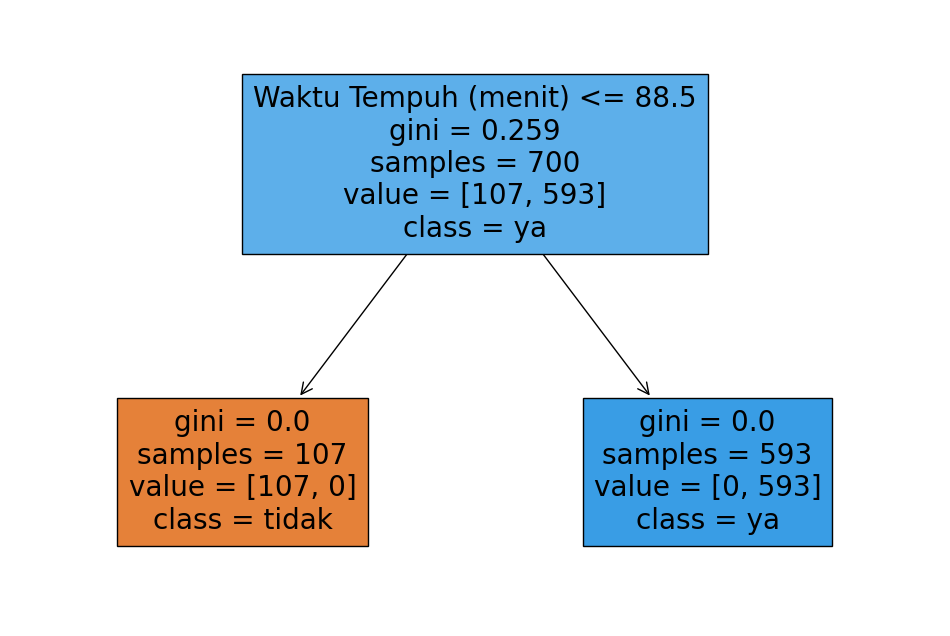

In [21]:
# Tentuka Fitur dan Target
X = df_Pelatihan[['Waktu Tempuh (menit)', 'Jarak Tempuh (km)']]
y = df_Pelatihan['Rekomendasi_TempatIstirahat']  # Memperbaiki pemilihan kolom target

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model decision tree
model_Rest = DecisionTreeClassifier(random_state=42)

# Latih model dengan data training
model_Rest.fit(X_train, y_train)

# Prediksi dengan data testing
y_pred = model_Rest.predict(X_test)

# Evaluasi akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

# Print laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))  # Menghapus parameter target_names karena hanya memiliki dua kelas

# Visualisasikan tree
plt.figure(figsize=(12, 8))
plot_tree(model_Rest, feature_names=X.columns, class_names=model_Rest.classes_, filled=True)  # Menggunakan plot_tree
plt.show()


In [22]:
# Coba model pada data testing
test_data = pd.DataFrame({
    'Waktu Tempuh (menit)': [90, 120, 60, 150],
    'Jarak Tempuh (km)': [50, 80, 40, 100]
})

predictions = model_Rest.predict(test_data)
print("Rekomendasikan Tempat Istiratah :", predictions)

Rekomendasikan Tempat Istiratah : ['ya' 'ya' 'tidak' 'ya']


##Pemodelan Tempat Penginapan

Akurasi: 1.00
Laporan Klasifikasi:
              precision    recall  f1-score   support

       tidak       1.00      1.00      1.00       248
          ya       1.00      1.00      1.00        52

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



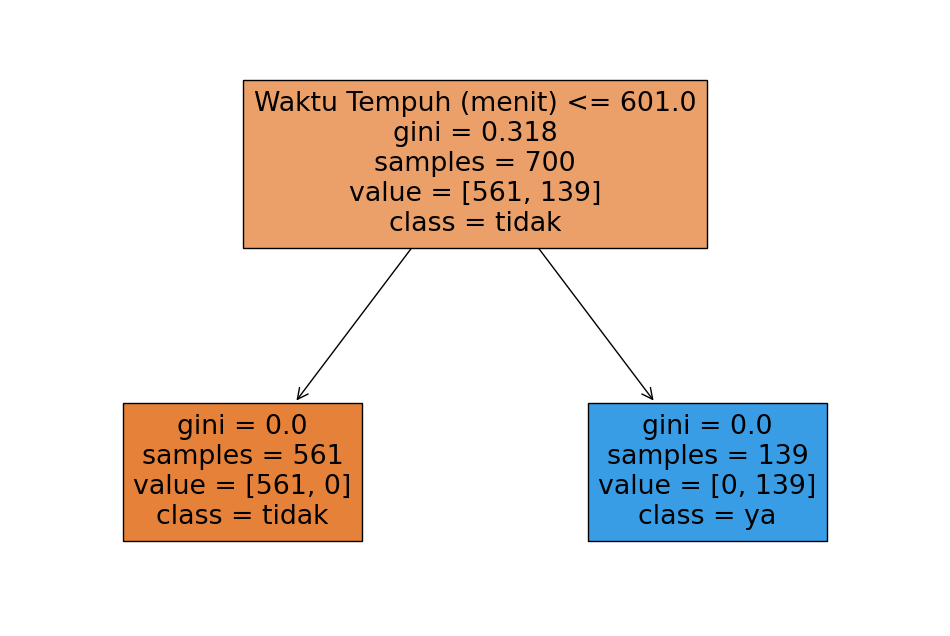

In [23]:
# Tentuka Fitur dan Target
XP = df_Pelatihan[['Waktu Tempuh (menit)']]
yP = df_Pelatihan['Rekomendasi_Penginapan']  # Memperbaiki pemilihan kolom target

# Bagi data menjadi training dan testing set
XP_train, XP_test, yP_train, yP_test = train_test_split(XP, yP, test_size=0.3, random_state=42)

# Inisialisasi model decision tree
model_Penginapan = DecisionTreeClassifier(random_state=42)

# Latih model dengan data training
model_Penginapan.fit(XP_train, yP_train)

# Prediksi dengan data testing
yP_pred = model_Penginapan.predict(XP_test)

# Evaluasi akurasi model
accuracy = accuracy_score(yP_test, yP_pred)
print(f'Akurasi: {accuracy:.2f}')

# Print laporan klasifikasi
print("Laporan Klasifikasi:")
print(classification_report(yP_test, yP_pred))

# Visualisasikan tree
plt.figure(figsize=(12, 8))
plot_tree(model_Penginapan, feature_names=XP.columns, class_names=model_Penginapan.classes_, filled=True)
plt.show()

In [24]:
# Coba model pada data testing
test_data = pd.DataFrame({
    'Waktu Tempuh (menit)': [610, 120, 60, 150]
})

predictions_Penginapan = model_Penginapan.predict(test_data)
print("Rekomendasikan Tempat Penginapan :", predictions_Penginapan)

Rekomendasikan Tempat Penginapan : ['ya' 'tidak' 'tidak' 'tidak']


#Convert & Save Model

In [25]:
!pip install m2cgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 892.4 kB/s eta 0:00:00


In [26]:
from sklearn.tree import DecisionTreeClassifier
import m2cgen as m2c
import joblib

# Simpan model menggunakan joblib
joblib.dump(model_Spbu, 'model_Spbu.pkl')
joblib.dump(model_Rest, 'model_Rest.pkl')
joblib.dump(model_Penginapan, 'model_Penginapan.pkl')

# Ekspor model menggunakan m2cgen
code_Spbu = m2c.export_to_python(model_Spbu)
code_Rest = m2c.export_to_python(model_Rest)
code_Penginapan = m2c.export_to_python(model_Penginapan)

print("Model SPBU:")
print(code_Spbu)  # Kode Python yang setara untuk model_Spbu

print("Model Rest:")
print(code_Rest)  # Kode Python yang setara untuk model_Rest

print("Model Penginapan:")
print(code_Penginapan)  # Kode Python yang setara untuk model_Penginapan


Model SPBU:
def score(input):
    if input[2] <= 244.72654724121094:
        if input[0] <= 6.5:
            if input[2] <= 152.72942733764648:
                var0 = [1.0, 0.0]
            else:
                if input[1] <= 48.70200538635254:
                    var0 = [0.0, 1.0]
                else:
                    if input[0] <= 4.5:
                        var0 = [0.0, 1.0]
                    else:
                        var0 = [1.0, 0.0]
        else:
            if input[0] <= 7.5:
                if input[2] <= 197.17945098876953:
                    var0 = [1.0, 0.0]
                else:
                    if input[1] <= 39.82222366333008:
                        var0 = [0.0, 1.0]
                    else:
                        var0 = [1.0, 0.0]
            else:
                if input[1] <= 30.116597175598145:
                    if input[0] <= 10.5:
                        var0 = [0.0, 1.0]
                    else:
                        var0 = [1.0, 0.0]
   

In [35]:
import tensorflow as tf

class CombinedDecisionTreeModel(tf.Module):
    def __init__(self):
        super(CombinedDecisionTreeModel, self).__init__()

    def __call__(self, x):
        result_Spbu = self.model_Spbu_logic(x)
        result_Rest = self.model_Rest_logic(x)
        result_Penginapan = self.model_Penginapan_logic(x)
        return result_Spbu, result_Rest, result_Penginapan

    def model_Spbu_logic(self, x):
        def score(input):
            cond1 = tf.math.less_equal(input[:, 2], 244.72654724121094)
            cond2 = tf.math.less_equal(input[:, 0], 6.5)
            cond3 = tf.math.less_equal(input[:, 2], 152.72942733764648)
            cond4 = tf.math.less_equal(input[:, 1], 48.70200538635254)
            cond5 = tf.math.less_equal(input[:, 0], 4.5)
            cond6 = tf.math.less_equal(input[:, 0], 7.5)
            cond7 = tf.math.less_equal(input[:, 2], 197.17945098876953)
            cond8 = tf.math.less_equal(input[:, 1], 39.82222366333008)
            cond9 = tf.math.less_equal(input[:, 1], 30.116597175598145)
            cond10 = tf.math.less_equal(input[:, 0], 10.5)
            cond11 = tf.math.less_equal(input[:, 0], 9.5)
            cond12 = tf.math.less_equal(input[:, 0], 7.5)
            cond13 = tf.math.less_equal(input[:, 2], 408.9936981201172)
            cond14 = tf.math.less_equal(input[:, 2], 291.3598175048828)
            cond15 = tf.math.less_equal(input[:, 2], 254.04132843017578)
            cond16 = tf.math.less_equal(input[:, 0], 11.5)
            cond17 = tf.math.less_equal(input[:, 1], 31.920262336730957)
            cond18 = tf.math.less_equal(input[:, 1], 31.563035011291504)
            cond19 = tf.math.less_equal(input[:, 2], 317.1391143798828)
            cond20 = tf.math.less_equal(input[:, 1], 35.667205810546875)
            cond21 = tf.math.less_equal(input[:, 2], 289.77980041503906)
            cond22 = tf.math.less_equal(input[:, 0], 13.5)
            cond23 = tf.math.less_equal(input[:, 2], 430.33001708984375)
            cond24 = tf.math.less_equal(input[:, 2], 426.2153625488281)
            cond25 = tf.math.less_equal(input[:, 2], 481.5303192138672)
            cond26 = tf.math.less_equal(input[:, 1], 45.10621452331543)
            cond27 = tf.math.less_equal(input[:, 1], 44.36541938781738)
            cond28 = tf.math.less_equal(input[:, 0], 601.0)

            var0 = tf.cond(
                cond1,
                lambda: tf.cond(
                    cond2,
                    lambda: tf.cond(
                        cond3,
                        lambda: tf.constant(True),
                        lambda: tf.cond(
                            cond4,
                            lambda: tf.constant(False),
                            lambda: tf.cond(
                                cond5,
                                lambda: tf.constant(False),
                                lambda: tf.constant(True)
                            )
                        )
                    ),
                    lambda: tf.cond(
                        cond6,
                        lambda: tf.cond(
                            cond7,
                            lambda: tf.constant(True),
                            lambda: tf.cond(
                                cond8,
                                lambda: tf.constant(False),
                                lambda: tf.constant(True)
                            )
                        ),
                        lambda: tf.cond(
                            cond9,
                            lambda: tf.constant(False),
                            lambda: tf.constant(True)
                        )
                    )
                ),
                lambda: tf.cond(
                    cond13,
                    lambda: tf.cond(
                        cond11,
                        lambda: tf.cond(
                            cond12,
                            lambda: tf.constant(False),
                            lambda: tf.cond(
                                cond14,
                                lambda: tf.cond(
                                    cond15,
                                    lambda: tf.constant(False),
                                    lambda: tf.constant(True)
                                ),
                                lambda: tf.constant(False)
                            )
                        ),
                        lambda: tf.cond(
                            cond10,
                            lambda: tf.constant(False),
                            lambda: tf.constant(True)
                        )
                    ),
                    lambda: tf.cond(
                        cond16,
                        lambda: tf.constant(True),
                        lambda: tf.cond(
                            cond17,
                            lambda: tf.cond(
                                cond19,
                                lambda: tf.cond(
                                    cond20,
                                    lambda: tf.constant(True),
                                    lambda: tf.cond(
                                        cond21,
                                        lambda: tf.constant(False),
                                        lambda: tf.constant(True)
                                    )
                                ),
                                lambda: tf.constant(True)
                            ),
                            lambda: tf.cond(
                                cond18,
                                lambda: tf.constant(True),
                                lambda: tf.constant(False)
                            )
                        )
                    )
                )
            )

            return tf.cast(var0, tf.float32)

        return score(x)

    def model_Rest_logic(self, x):
        def score(input):
            return tf.math.less_equal(input[:, 0], 88.5)

        return tf.cast(score(x), tf.float32)

    def model_Penginapan_logic(self, x):
        def score(input):
            return tf.math.less_equal(input[:, 0], 601.0)

        return tf.cast(score(x), tf.float32)

import tensorflow as tf

# Membuat instance model gabungan
combined_model = CombinedDecisionTreeModel()

# Definisikan input_dim sesuai dengan dimensi input data Anda
input_dim = XS.shape[1]  # Misalnya berdasarkan model_Spbu

# Konversi model gabungan ke TensorFlow Lite
concrete_func = tf.function(combined_model.__call__).get_concrete_function(tf.TensorSpec([None, input_dim], tf.float32))
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])

# Definisikan metadata
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.target_spec.supported_types = [tf.float32]
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Menambahkan metadata
converter.experimental_new_converter = True
converter.experimental_new_metadata = {
    "name": "CombinedDecisionTreeModel",
    "description": "Model for combined decision tree logic",
    "version": "1",
    "author": "MLCOHORT",
    "date": "2024-06-17",
}

# Konversi ke TensorFlow Lite model
tflite_model = converter.convert()

# Simpan model TFLite gabungan
with open('combined_model.tflite', 'wb') as f:
    f.write(tflite_model)



#VERIFIKASI MODEL

In [28]:
pip install tflite-support

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 12.0 MB/s eta 0:00:00


In [39]:
import tensorflow as tf

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path="combined_model.tflite")
interpreter.allocate_tensors()

# Get input details
input_details = interpreter.get_input_details()

# Get output details
output_details = interpreter.get_output_details()

# Print input details
print("Input details:")
print(input_details)

# Print output details
print("\nOutput details:")
print(output_details)

# Try to access metadata
try:
    metadata = interpreter.get_metadata()
    print("\nMetadata information:")
    print(metadata)
except AttributeError:
    print("\nModel does not contain metadata.")


Input details:
[{'name': 'x', 'index': 0, 'shape': array([1, 3], dtype=int32), 'shape_signature': array([-1,  3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]

Output details:
[{'name': 'Identity', 'index': 57, 'shape': array([], dtype=int32), 'shape_signature': array([], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'Identity_1', 'index': 47, 'shape': array([1], dtype=int32), 'shape_signature': array([-1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sp

In [41]:
import json

# Definisikan metadata
metadata = {
    "name": "Combined Decision Tree Model",
    "description": "Combined model for predicting SPBU, Rest, and Penginapan",
    "version": "1.0.0",
    "author": "MLCohort",
    "license": "Apache License 2.0",
    "input": {
        "x": {
            "description": "Input tensor",
            "type": "float32",
            "shape": [-1, 3],
            "content": {
                "content_type": "text",
                "content_data": "Numeric data representing features"
            }
        }
    },
    "output": {
        "result_Spbu": {
            "description": "Output for SPBU recommendation",
            "type": "float32",
            "shape": [1],
            "content": {
                "content_type": "text",
                "content_data": "Binary classification result (0 or 1)"
            }
        },
        "result_Rest": {
            "description": "Output for Restaurant recommendation",
            "type": "float32",
            "shape": [1],
            "content": {
                "content_type": "text",
                "content_data": "Binary classification result (0 or 1)"
            }
        },
        "result_Penginapan": {
            "description": "Output for Penginapan recommendation",
            "type": "float32",
            "shape": [1],
            "content": {
                "content_type": "text",
                "content_data": "Binary classification result (0 or 1)"
            }
        }
    }
}

# Simpan metadata ke file JSON
metadata_file = "combined_model_metadata.json"
with open(metadata_file, 'w') as f:
    json.dump(metadata, f, indent=4)

print(f"Metadata file saved to {metadata_file}")


Metadata file saved to combined_model_metadata.json
